## Customer Segmentation Using K-Means Clustering
---
This unsupervised learning project focuses on segmenting customers based on their financial behavior using K-Means clustering. The dataset includes key features such as Balance Frequency (how often customers maintain a balance), Purchases (total amount spent), Payments (total amount paid), Credit Limit, and Cash Advance (amount of cash withdrawn).

The objective of the project was to group customers into distinct segments based on their spending and payment patterns. By using K-Means clustering, customers were clustered into several groups to identify patterns, such as high spenders, frequent balance holders, or cash advance users. These clusters can be leveraged to tailor marketing strategies, improve customer retention, or offer personalized financial products.

In [1]:
import pandas as pd
df = pd.read_csv("Credit_card.csv")
df.head(10)

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
5,C10006,1.000000,1333.28,1400.057770,1800.0,0.000000
6,C10007,1.000000,7091.01,6354.314328,13500.0,0.000000
7,C10008,1.000000,436.20,679.065082,2300.0,0.000000
8,C10009,1.000000,861.49,688.278568,7000.0,0.000000
9,C10010,0.545455,1281.60,1164.770591,11000.0,0.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [7]:
df.duplicated().sum()

0

In [3]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.0,39.635000,361.280000,1110.130000,49039.57000
PAYMENTS,8950.0,1733.143852,2895.063757,0.0,383.276166,856.901546,1901.134317,50721.48336
CREDIT_LIMIT,8949.0,4494.449450,3638.815725,50.0,1600.000000,3000.000000,6500.000000,30000.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.0,0.000000,0.000000,1113.821139,47137.21176


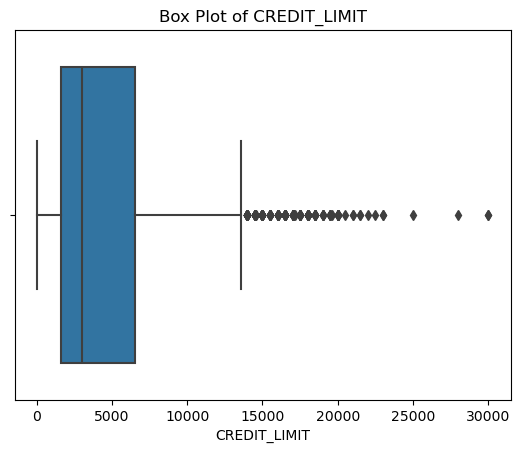

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a box plot to detect outliers
sns.boxplot(x=df['CREDIT_LIMIT'])
plt.title('Box Plot of CREDIT_LIMIT')
plt.xlabel('CREDIT_LIMIT')
plt.show()


Box plot indicates presence of multiple outliers, also that the data is positively skewed. Hence filling the missing value with the median of the CREDIT_LIMIT column is best approach for handling it's missing value.

In [8]:
# Handling missing value in CREDIT_LIMIT column
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [9]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64

In [10]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [11]:
df

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...
8945,1.000000,291.12,325.594462,1000.0,0.000000
8946,1.000000,300.00,275.861322,1000.0,0.000000
8947,0.833333,144.40,81.270775,1000.0,0.000000
8948,0.833333,0.00,52.549959,500.0,36.558778


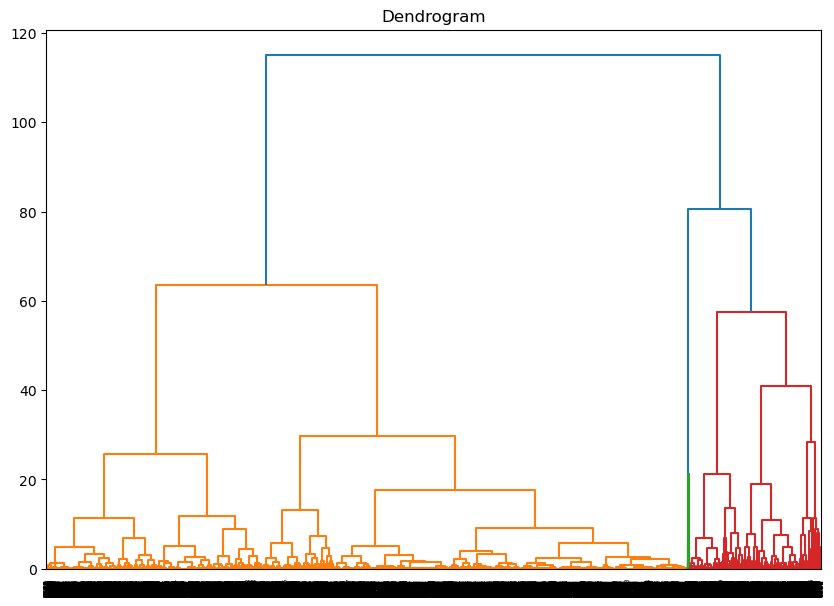

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['PURCHASES', 'CREDIT_LIMIT']])

# Hierarchical clustering
D = linkage(X_scaled, method='ward')  # 'ward' minimizes the variance within clusters
plt.figure(figsize=(10, 7))
dendrogram(D)
plt.title('Dendrogram')
plt.show()


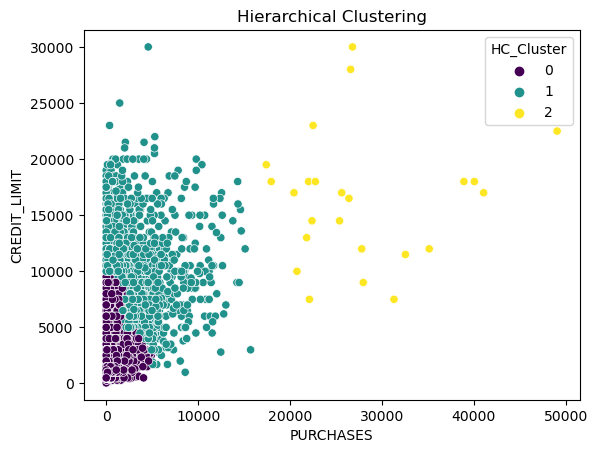

In [13]:
# Applying Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = hc.fit_predict(X_scaled)

# Adding clusters to the dataset for optimal interpretation
df['HC_Cluster'] = clusters

# Visualizing the clusters
sns.scatterplot(x='PURCHASES', y='CREDIT_LIMIT', hue='HC_Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()


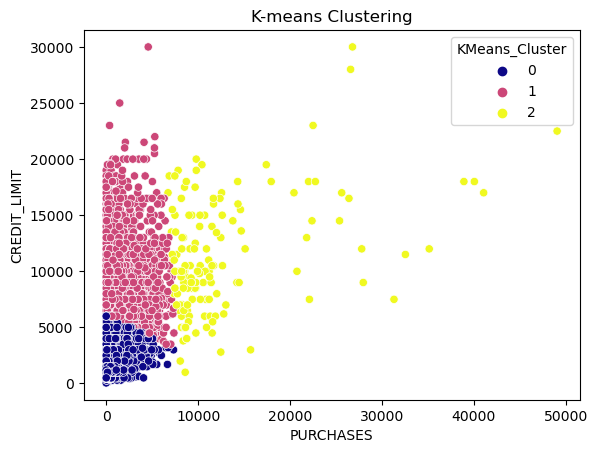

In [18]:
# Partition Clustering

from sklearn.cluster import KMeans

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# Plotting the clusters
sns.scatterplot(x='PURCHASES', y='CREDIT_LIMIT', hue='KMeans_Cluster', data=df, palette='plasma')
plt.title('K-means Clustering')
plt.show()


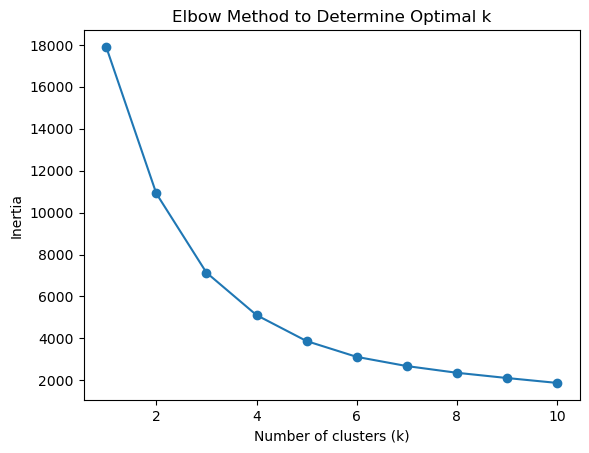

In [20]:
# Using the elbow method to find the optimal k
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


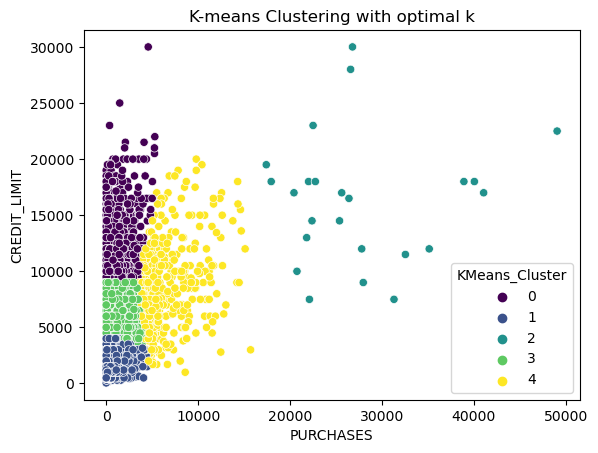

In [25]:
#Re-run K-means clustering with optimal k
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# Plotting the clusters
sns.scatterplot(x='PURCHASES', y='CREDIT_LIMIT', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-means Clustering with optimal k')
plt.show()


## Results Analysis

**General Observations:**

- The separation between high spenders and low spenders is clear, indicating that the clustering process worked well to distinguish      customer behavior.

-There seems to be a group of customers who have high credit limits but are underutilizing them (Clusters 0 and 1). These could   represent opportunities for growth if effectively incentivized.

### Cluster Analysis:

**Cluster 0 (Yellow):**

- Located in the low-to-moderate purchase range (up to around 10,000) and a credit limit range mostly under 15,000.

- These customers may represent conservative or moderate spenders. They maintain a relatively controlled balance between spending and their available credit.

*Actionable Insight*: You could offer these customers tailored rewards or credit line increases to encourage higher spending, especially those near the upper limit.

**Cluster 1 (Purple):**

- Concentrated in the lower purchase range (below 10,000) but with a relatively wide spread in credit limits, from low to mid-range (up to 20,000).

- This group might include low spenders with high credit potential. Despite having available credit, they aren’t utilizing it much for purchases.

*Actionable Insight*: Focus on providing incentives, such as cashback or loyalty programs, to encourage them to increase their spending or use their credit more actively.

**Cluster 2 (Light Blue):**

- Spread over higher purchase amounts (10,000–50,000) and mostly higher credit limits (above 15,000, up to 30,000).

- These are likely high spenders who make significant purchases and have high credit limits.

*Actionable Insight*: This group can be targeted with premium services or exclusive offers, such as travel rewards or elite memberships, to maintain their loyalty and encourage even greater spending.

**Cluster 3 (Dark Blue):**

- In the very low purchase range (under 5,000) and lower credit limits (mostly under 10,000).

- These customers likely have low spending behavior and low credit limits, possibly new or inactive users.

*Actionable Insight*: Reaching out to this group with promotions aimed at increasing engagement, such as introductory offers or personalized financial education may help them leverage their credit more effectively.

### Next Steps:

- Personalized Campaigns: Design marketing or customer engagement campaigns tailored to each group's behavior, based on these clusters.
- Risk Management: Review spending patterns for outliers (such as very high purchases in Cluster 2) to identify potential credit risk.


